In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



In [3]:
test_df = pd.read_csv('../input/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
from scipy import stats
import seaborn as sns

In [5]:
train_df = pd.read_csv('../input/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.count

<bound method DataFrame.count of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12         

In [7]:
train_df.shape[0]

1460

In [8]:
print(train_df.shape[1])
train_df.columns

81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [10]:
null_val = pd.concat([train_df.isnull().sum(),train_df.isnull().sum()/train_df.shape[0],
                     test_df.isnull().sum(),train_df.isnull().sum()/test_df.shape[0]],
                    axis =1 ,keys = ['train_null_count','%_null','test_null_count','%_null'])
null_val[null_val.sum(axis=1)>0]

,train_null_count,%_null,test_null_count,%_null
Alley,1369,0.937671,1352.0,0.938314
BsmtCond,37,0.025342,45.0,0.025360
BsmtExposure,38,0.026027,44.0,0.026045
BsmtFinSF1,0,0.000000,1.0,0.000000
BsmtFinSF2,0,0.000000,1.0,0.000000
BsmtFinType1,37,0.025342,42.0,0.025360
BsmtFinType2,38,0.026027,42.0,0.026045
BsmtFullBath,0,0.000000,2.0,0.000000
BsmtHalfBath,0,0.000000,2.0,0.000000
BsmtQual,37,0.025342,44.0,0.025360


In [11]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

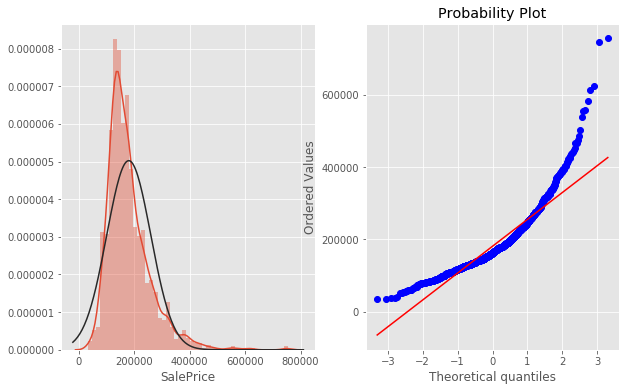

Skewness: 1.882876
Kurtosis: 6.536282


In [12]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.figure()
plt.subplot(1, 2, 1)
sns.distplot(train_df['SalePrice'], fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

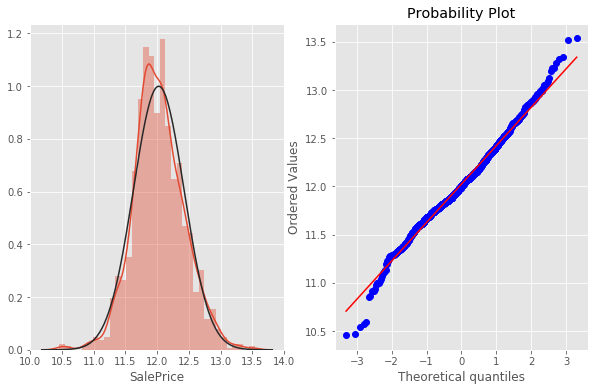

Skewness: 0.121347
Kurtosis: 0.809519


In [13]:
plt.figure()
plt.subplot(1, 2, 1)
sns.distplot(np.log(train_df['SalePrice']+1), fit=stats.norm)
plt.subplot(1, 2, 2)
stats.probplot(np.log(train_df['SalePrice']+1), plot=plt)
plt.show()
print("Skewness: %f" % np.log(train_df['SalePrice']+1).skew())
print("Kurtosis: %f" % np.log(train_df['SalePrice']+1).kurt())

In [14]:
corrmat = train_df.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


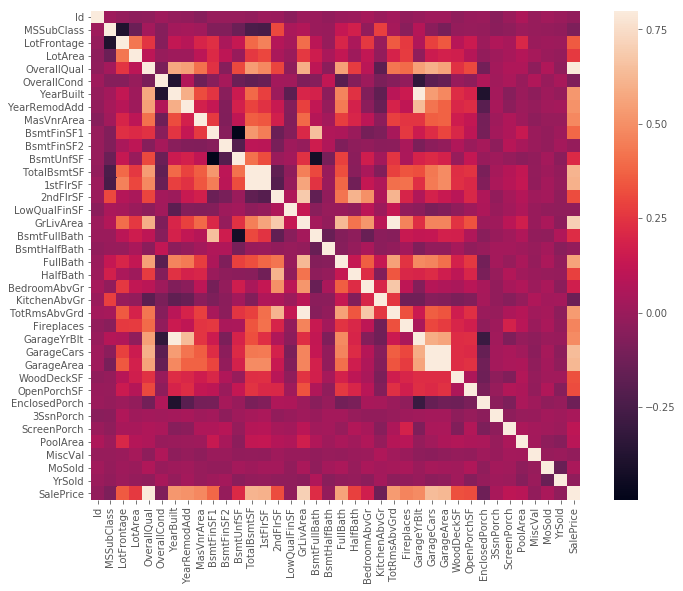

In [15]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [16]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index

In [17]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

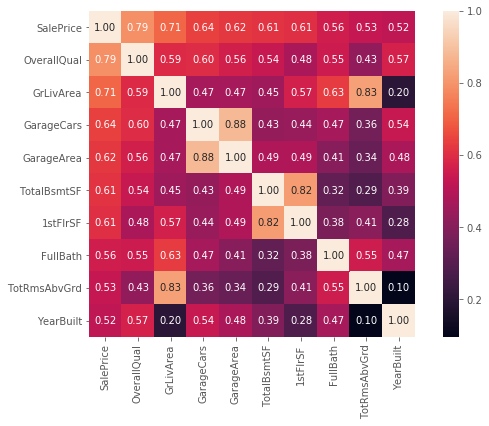

In [18]:
cm = np.corrcoef(train_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

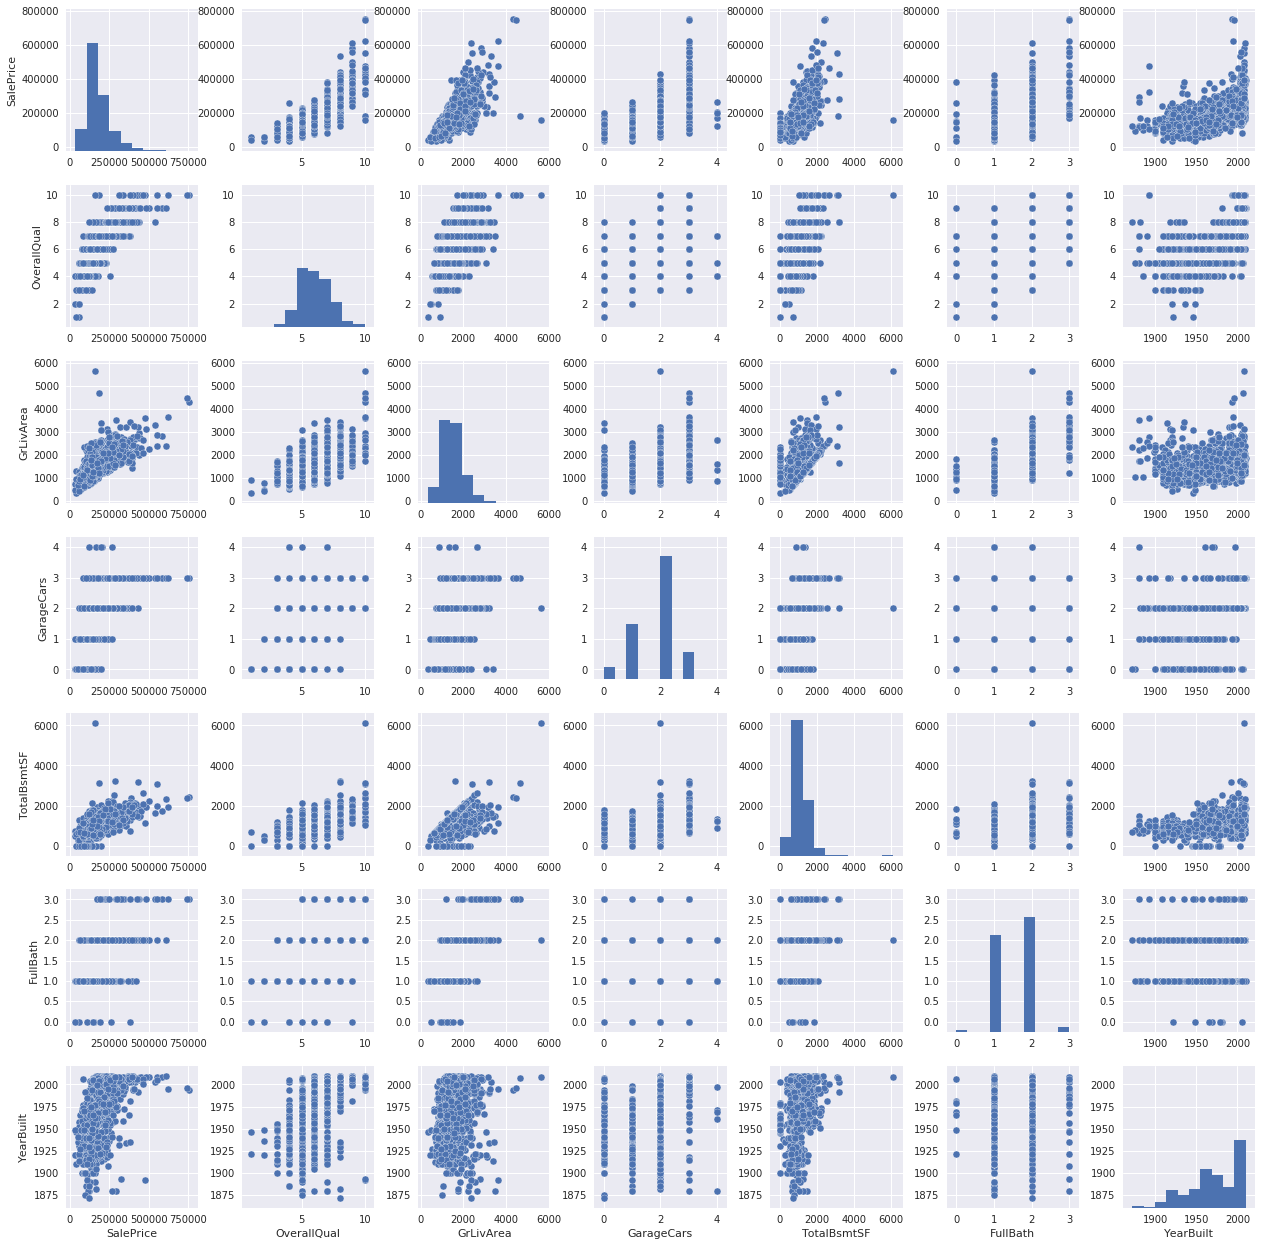

In [19]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size=2.5)
plt.show()

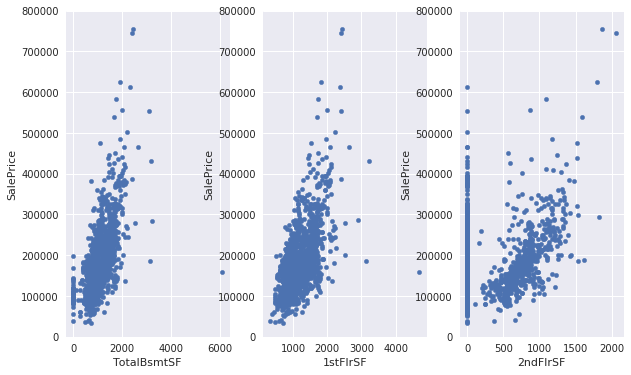

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
data_total = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
data_total.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000), ax=ax1)
data1 = pd.concat([train_df['SalePrice'], train_df['1stFlrSF']], axis=1)
data1.plot.scatter(x='1stFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax2)
data2 = pd.concat([train_df['SalePrice'], train_df['2ndFlrSF']], axis=1)
data2.plot.scatter(x='2ndFlrSF', y='SalePrice', ylim=(0, 800000), ax=ax3)
plt.show()

In [21]:
train_df['TotalBsmtSF'] = train_df['TotalBsmtSF'].fillna(0)
train_df['1stFlrSF'] = train_df['1stFlrSF'].fillna(0)
train_df['2ndFlrSF'] = train_df['2ndFlrSF'].fillna(0)
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

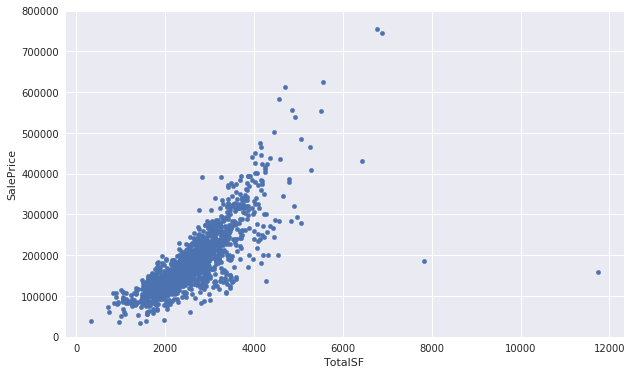

In [22]:
data2 = pd.concat([train_df['SalePrice'], train_df['TotalSF']], axis=1)
data2.plot.scatter(x='TotalSF', y='SalePrice', ylim=(0, 800000))
plt.show()

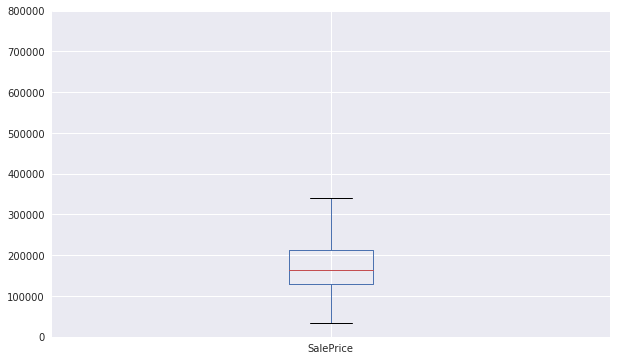

In [23]:
data2 = pd.concat([train_df['SalePrice'], train_df['TotalSF']], axis=1)
data2.plot.box(x='TotalSF', y='SalePrice', ylim=(0, 800000))
plt.show()

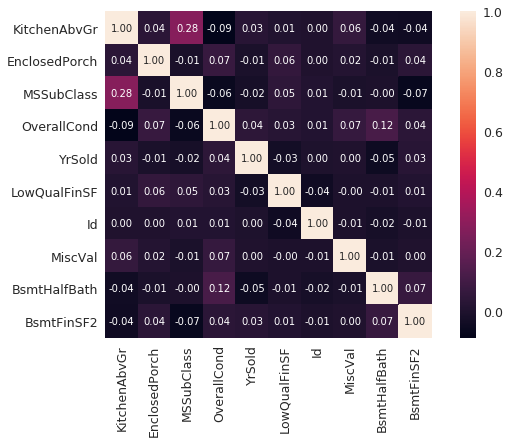

In [24]:
corrmat = train_df.corr()
cols = corrmat.nsmallest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [25]:
corrmat = train_df.corr()
cols = corrmat.nsmallest(20,'SalePrice')['SalePrice'].index
cols

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr',
       'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF'],
      dtype='object')

In [26]:
corrmat = train_df.corr()
corrmat.nsmallest(10,'SalePrice')['SalePrice']

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

In [27]:
corrmat = train_df.corr().abs()
corrmat.nsmallest(10,'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
BsmtFinSF2,0.005968,0.065649,0.049900,0.111170,0.059119,0.040229,0.049107,0.067759,0.072319,0.050117,...,0.003093,0.036543,0.029993,0.088871,0.041709,0.004940,0.015211,0.031706,0.011378,0.048916
BsmtHalfBath,0.020155,0.002333,0.007234,0.048046,0.040150,0.117821,0.038162,0.012337,0.026673,0.067418,...,0.025324,0.008555,0.035114,0.032121,0.020025,0.007367,0.032873,0.046524,0.016844,0.011921
MiscVal,0.006242,0.007683,0.003368,0.038068,0.031406,0.068777,0.034383,0.010286,0.029815,0.003571,...,0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,0.006495,0.004906,0.021190,0.011186
Id,1.000000,0.011156,0.010601,0.033226,0.028365,0.012609,0.012713,0.021998,0.050298,0.005024,...,0.000477,0.002889,0.046635,0.001330,0.057044,0.006242,0.021172,0.000712,0.021917,0.000322
LowQualFinSF,0.044230,0.046474,0.038469,0.004779,0.030429,0.025494,0.183784,0.062419,0.069071,0.064503,...,0.018251,0.061081,0.004296,0.026799,0.062157,0.003793,0.022174,0.028921,0.025606,0.009207
YrSold,0.000712,0.021407,0.007450,0.014261,0.027347,0.043950,0.013618,0.035743,0.008201,0.014359,...,0.057619,0.009916,0.018645,0.010694,0.059689,0.004906,0.145721,1.000000,0.028923,0.029638
3SsnPorch,0.046635,0.043825,0.070029,0.020423,0.030371,0.025504,0.031355,0.045286,0.018796,0.026451,...,0.005842,0.037305,1.000000,0.031436,0.007992,0.000354,0.029474,0.018645,0.044584,0.033414
MoSold,0.021172,0.013585,0.011200,0.001205,0.070815,0.003511,0.012398,0.021490,0.005965,0.015727,...,0.071255,0.028887,0.029474,0.023217,0.033737,0.006495,1.000000,0.145721,0.046432,0.040485
OverallCond,0.012609,0.059316,0.059213,0.005636,0.091932,1.000000,0.375983,0.073741,0.128101,0.046231,...,0.032589,0.070356,0.025504,0.054811,0.001985,0.068777,0.003511,0.043950,0.077856,0.143814
MSSubClass,0.011156,1.000000,0.386347,0.139781,0.032628,0.059316,0.027850,0.040581,0.022936,0.069836,...,0.006100,0.012037,0.043825,0.026030,0.008283,0.007683,0.013585,0.021407,0.084284,0.082225


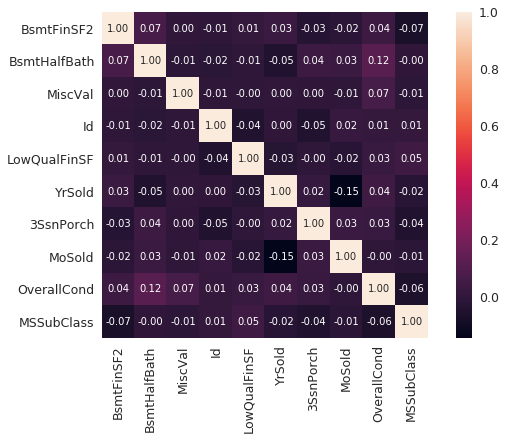

In [28]:
corrmat = train_df.corr().abs()
cols = corrmat.nsmallest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [29]:
corrmat = train_df.corr().abs()
corrmat.nsmallest(30,'SalePrice')['SalePrice']

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
Name: SalePrice, dtype: float64

In [30]:
categoricals = train_df.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [31]:
categoricals.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [32]:
category_null = pd.concat([categoricals.isnull().sum(),categoricals.isnull().sum()/categoricals.shape[0]],axis =1,keys=['category_count','%count'])
category_null[category_null.sum(axis=1)>0]

,category_count,%count
Alley,1369,0.937671
MasVnrType,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685
FireplaceQu,690,0.472603
GarageType,81,0.055479


In [33]:
categoricals.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
train_df[ 'RoofMatl'].describe()

count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object

In [35]:
roof = pd.get_dummies(train_df.RoofMatl, drop_first=True)
roof.describe()

,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.982192,0.000685,0.000685,0.000685,0.007534,0.003425,0.004110
std,0.132299,0.026171,0.026171,0.026171,0.086502,0.058440,0.063996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df = pd.concat([roof,train_df['SalePrice']],axis=1)

In [37]:
df.head()

,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,SalePrice
0,1,0,0,0,0,0,0,208500
1,1,0,0,0,0,0,0,181500
2,1,0,0,0,0,0,0,223500
3,1,0,0,0,0,0,0,140000
4,1,0,0,0,0,0,0,250000


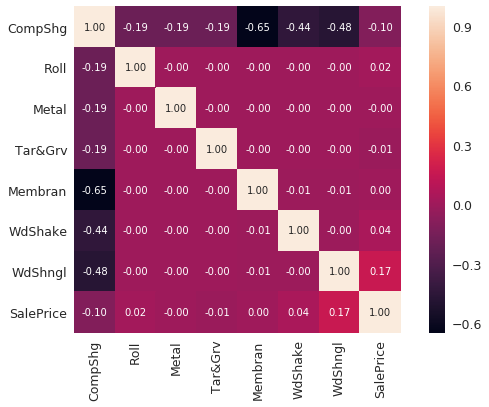

In [38]:
corrmat = df.corr()
cols = corrmat.nsmallest(8,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [39]:
train_df['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

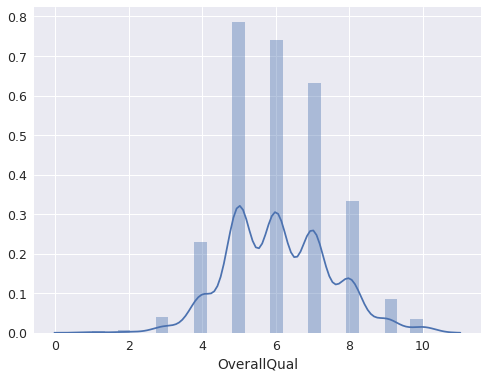

In [40]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.distplot(train_df['OverallQual'])
plt.show()

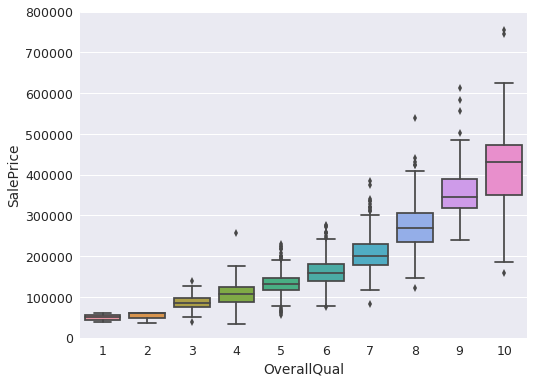

In [41]:
overall_qual = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=overall_qual)
fig.axis(ymin=0, ymax=800000)
plt.show()

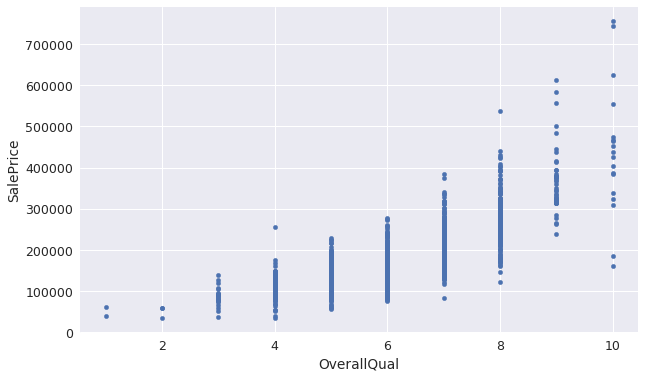

In [42]:
overall_qual.plot.scatter(x='OverallQual', y="SalePrice")
plt.show()

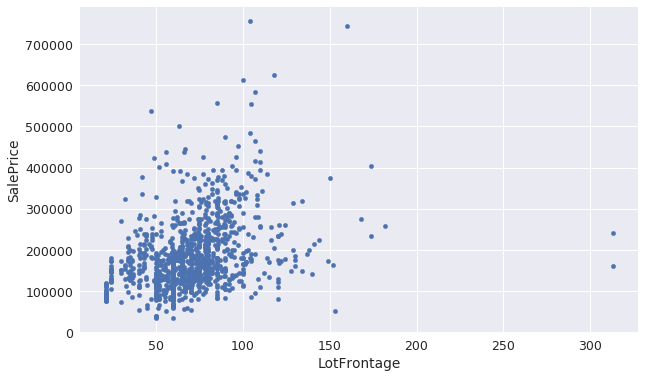

In [43]:
data = pd.concat([train_df['SalePrice'],train_df['LotFrontage']],axis=1)
data.plot.scatter(x='LotFrontage', y="SalePrice")
plt.show()

In [44]:
train_df['LotConfig'].describe()

count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object

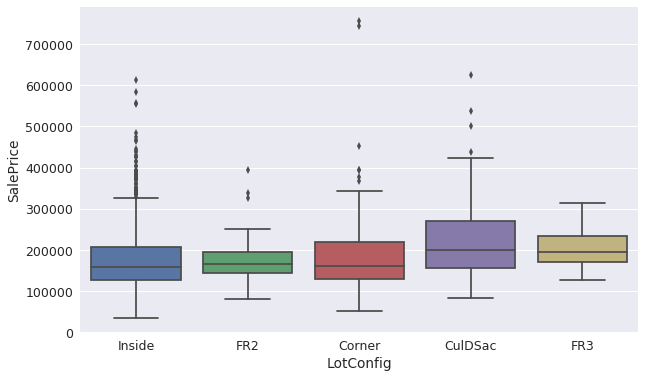

In [45]:
data = pd.concat([train_df['SalePrice'],train_df['LotConfig']],axis=1)
fig = sns.boxplot(x='LotConfig', y="SalePrice", data=data)
plt.show()

In [46]:
train_df['LotShape'].describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

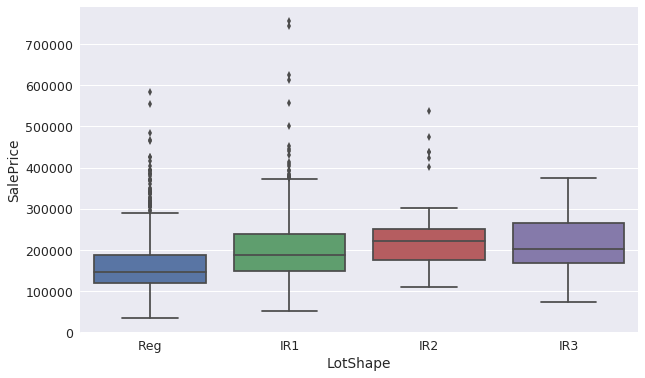

In [47]:
data = pd.concat([train_df['SalePrice'],train_df['LotShape']],axis=1)
fig = sns.boxplot(x='LotShape', y="SalePrice", data=data)
plt.show()

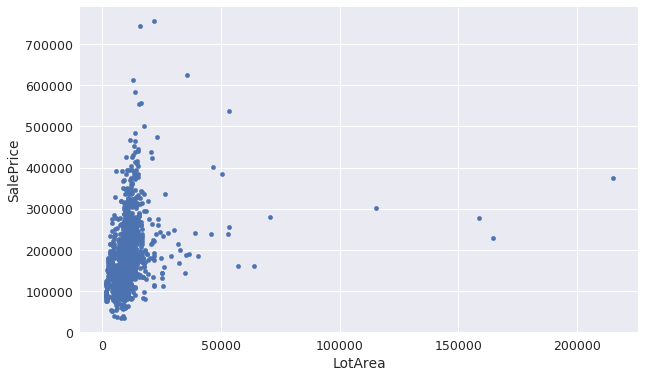

In [48]:
data = pd.concat([train_df['SalePrice'],train_df['LotArea']],axis=1)
data.plot.scatter(x='LotArea', y="SalePrice")
plt.show()

In [49]:
train_df['LandContour'].describe()

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object

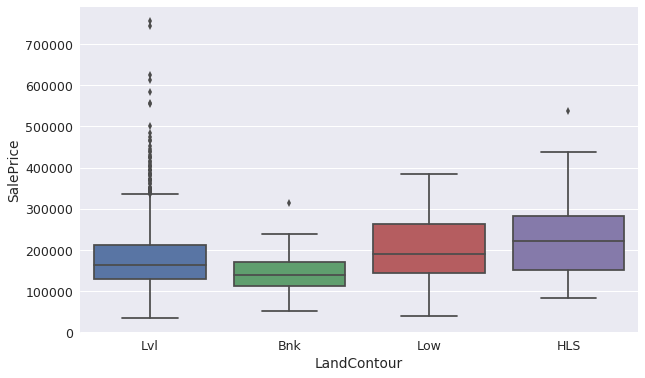

In [50]:
data = pd.concat([train_df['LandContour'],train_df['SalePrice']],axis=1)
fig = sns.boxplot(x='LandContour',y='SalePrice',data=data)
plt.show()

In [51]:
train_df['LotShape'].describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

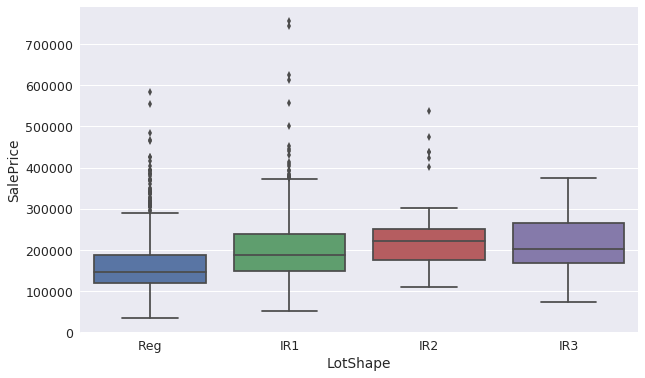

In [52]:
data = pd.concat([train_df['SalePrice'],train_df['LotShape']],axis=1)
fig = sns.boxplot(x='LotShape', y="SalePrice",data=data)
plt.show()

In [53]:
train_df['Condition1'].describe()

count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object

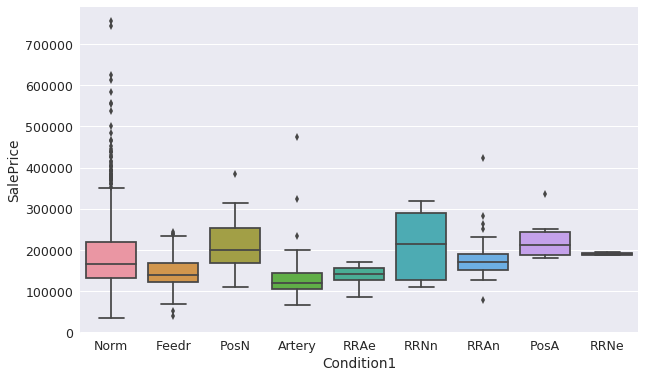

In [54]:
data = pd.concat([train_df['SalePrice'],train_df['Condition1']],axis=1)
fig = sns.boxplot(x='Condition1', y="SalePrice",data=data)
plt.show()

In [55]:
train_df['Condition2'].describe()

count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object

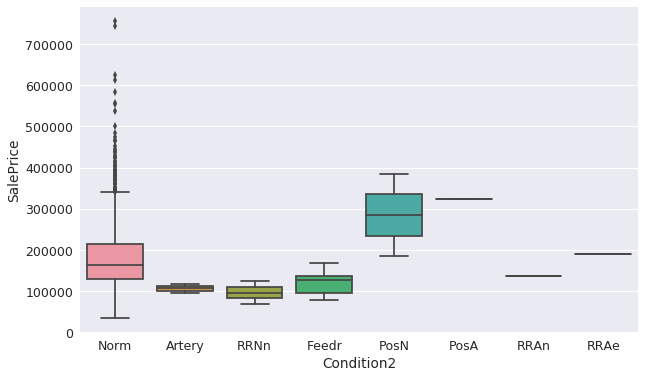

In [56]:
data = pd.concat([train_df['SalePrice'],train_df['Condition2']],axis=1)
fig = sns.boxplot(x='Condition2', y="SalePrice",data=data)
plt.show()

In [57]:
train_df['Neighborhood'].describe()

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

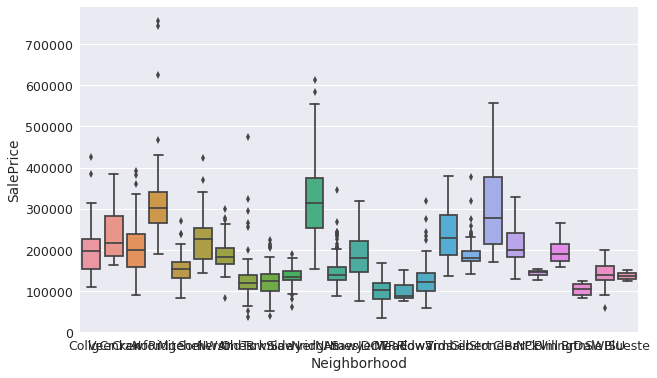

In [58]:
data = pd.concat([train_df['SalePrice'],train_df['Neighborhood']],axis=1)
fig = sns.boxplot(x='Neighborhood', y="SalePrice",data=data)
plt.show()

In [59]:
train_df['OverallCond'].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

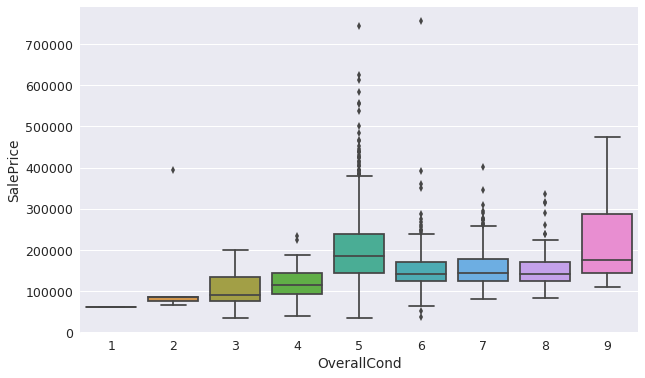

In [60]:
data = pd.concat([train_df['SalePrice'],train_df['OverallCond']],axis=1)
fig = sns.boxplot(x='OverallCond', y="SalePrice",data=data)
plt.show()

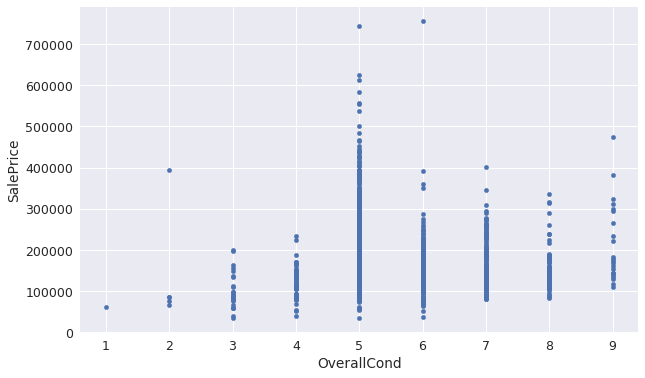

In [61]:
data.plot.scatter(x='OverallCond', y="SalePrice")
plt.show()

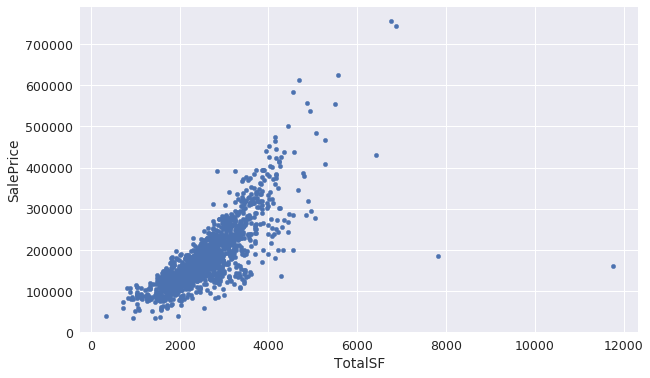

In [62]:
data = pd.concat([train_df['SalePrice'],train_df['TotalSF']],axis=1)
data.plot.scatter(x='TotalSF', y="SalePrice")
plt.show()

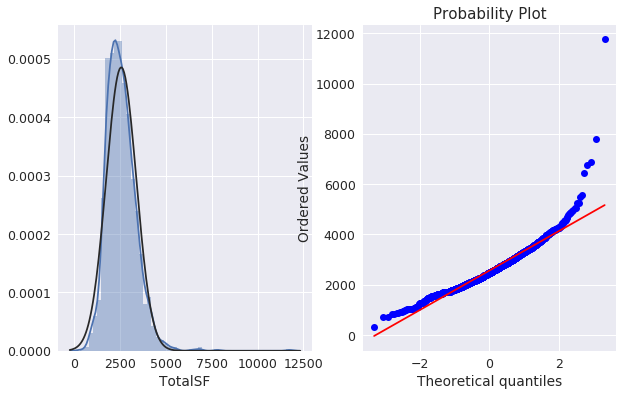

In [63]:
plt.figure();
plt.subplot(1,2,1)
sns.distplot(train_df['TotalSF'],fit=stats.norm)
plt.subplot(1,2,2)
stats.probplot(train_df['TotalSF'],plot=plt)
plt.show()

In [64]:
print(train_df['TotalSF'].skew())
print(train_df['TotalSF'].kurt())

1.77669962724
12.6219682969


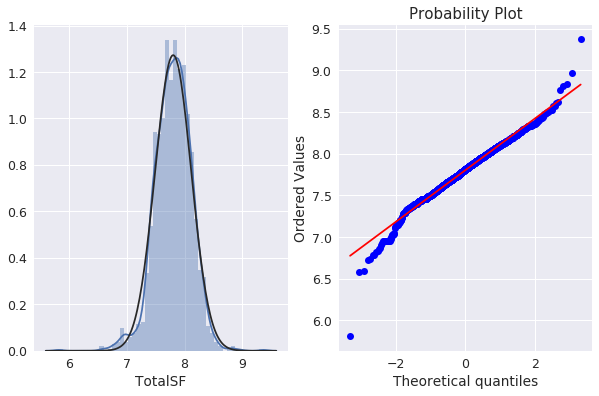

In [65]:
plt.figure();
plt.subplot(1,2,1)
sns.distplot(np.log(train_df['TotalSF']),fit=stats.norm)
plt.subplot(1,2,2)
stats.probplot(np.log(train_df['TotalSF']),plot=plt)
plt.show()

In [66]:
print(np.log(train_df['TotalSF'].skew()))

0.574757501254


In [67]:
print(np.log(train_df['TotalSF'].kurt()))

2.53543881142


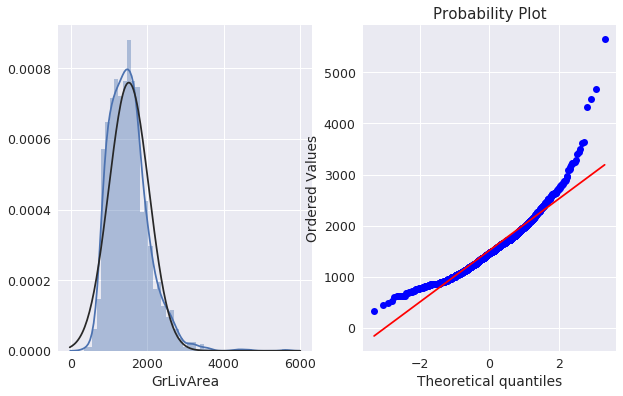

1.36656035602
4.89512058069


In [68]:
plt.figure();
plt.subplot(1,2,1)
sns.distplot(train_df['GrLivArea'],fit=stats.norm)
plt.subplot(1,2,2)
stats.probplot(train_df['GrLivArea'],plot=plt)
plt.show()
print(train_df['GrLivArea'].skew())
print(train_df['GrLivArea'].kurt())

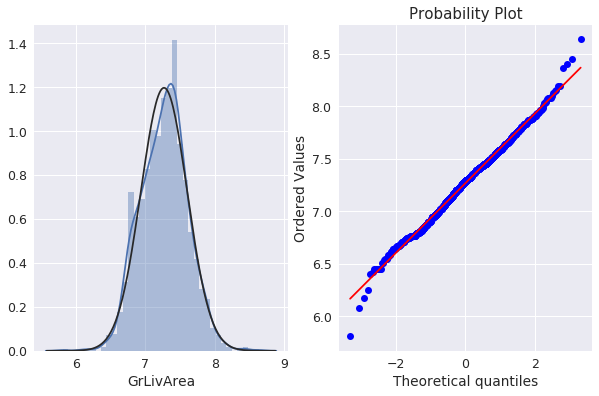

-0.00699518218769
0.282602688501


In [69]:
plt.figure();
plt.subplot(1,2,1)
sns.distplot(np.log(train_df['GrLivArea']),fit=stats.norm)
plt.subplot(1,2,2)
stats.probplot(np.log(train_df['GrLivArea']),plot=plt)
plt.show()
print(np.log(train_df['GrLivArea']).skew())
print(np.log(train_df['GrLivArea']).kurt())

In [70]:
train_df['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

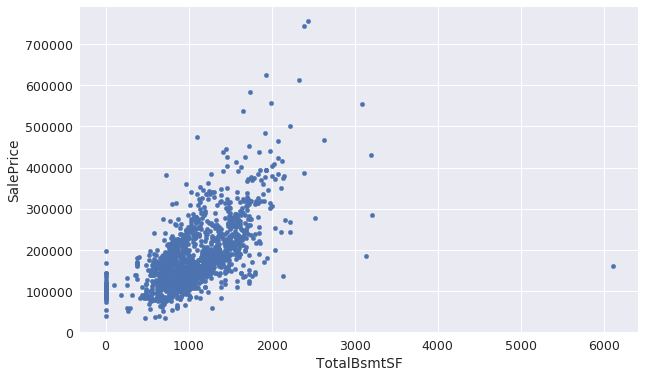

In [71]:
data1 = pd.concat([train_df['TotalBsmtSF'],train_df['SalePrice']],axis=1)
data1.plot.scatter(x='TotalBsmtSF',y='SalePrice')
plt.show()

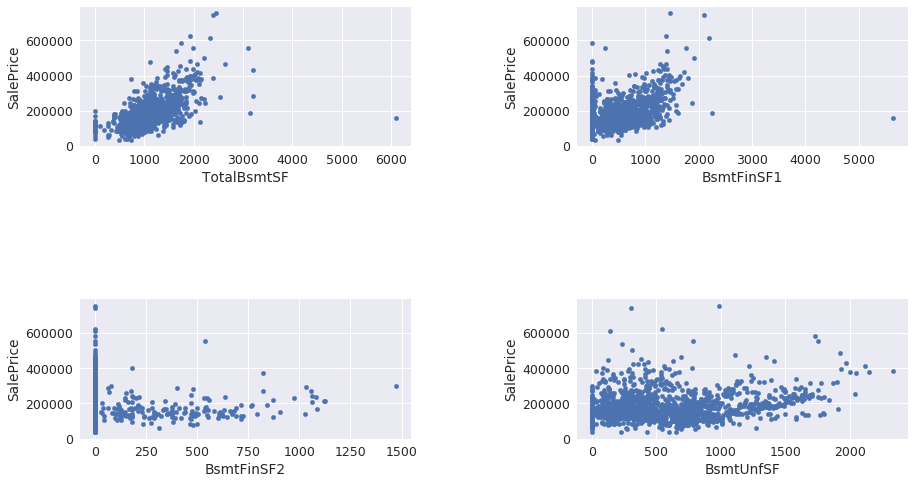

In [72]:
f, ax1 = plt.subplots(figsize=(20,15) ,ncols=2, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.7    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.5    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots


plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
data1 = pd.concat([train_df['TotalBsmtSF'],train_df['SalePrice']],axis=1)
data1.plot.scatter(x='TotalBsmtSF',y='SalePrice',ax=ax1[0][0])
data1 = pd.concat([train_df['BsmtFinSF1'],train_df['SalePrice']],axis=1)
data1.plot.scatter(x='BsmtFinSF1',y='SalePrice',ax=ax1[0][1])
data1 = pd.concat([train_df['BsmtFinSF2'],train_df['SalePrice']],axis=1)
data1.plot.scatter(x='BsmtFinSF2',y='SalePrice',ax=ax1[1][0])
data1 = pd.concat([train_df['BsmtUnfSF'],train_df['SalePrice']],axis=1)
data1.plot.scatter(x='BsmtUnfSF',y='SalePrice',ax=ax1[1][1])
plt.show()

In [73]:
train_df['Exterior2nd'].describe()

count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object

In [74]:
train_df['Exterior2nd'].mode()

0    VinylSd
dtype: object

In [75]:
train_df['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [76]:
train_df['MSSubClass'].head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [77]:
train_df1 = pd.get_dummies(train_df,drop_first=True)

In [78]:
train_df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [79]:
## After this we do variable dropping and variable manipulation for linear regression
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [80]:
train.drop(['Id','Alley','FireplaceQu', 'PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [81]:
train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [82]:
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0)
train['1stFlrSF'] = train['1stFlrSF'].fillna(0)
train['2ndFlrSF'] = train['2ndFlrSF'].fillna(0)
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
train.drop(['GarageArea','TotRmsAbvGrd'], axis=1, inplace=True) # as analysis before

In [83]:
train.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'MasVnrType', 'Heating', 'LowQualFinSF',
            'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Functional', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'WoodDeckSF',
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal'], axis=1, inplace=True)

In [84]:
## Normalize data 
numeric_data = train.loc[:, ['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_data_standardized = (numeric_data - numeric_data.mean())/numeric_data.std()

In [85]:
#  Fillling nan values 
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['GarageCars'] = train['GarageCars'].fillna(0.0)
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior2nd'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

In [86]:

train['MSSubClass'] = train['MSSubClass'].astype(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['KitchenAbvGr'] = train['KitchenAbvGr'].astype(str)

train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)


In [87]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
train.drop(['SaleType'],axis=1,inplace=True)

In [88]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
HeatingQC        0
CentralAir       0
Electrical       0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Fireplaces       0
GarageCars       0
PavedDrive       0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
TotalSF          0
enc_condition    0
dtype: int64

In [89]:
sum(train.isnull().sum() != 0)

0

In [90]:
print(train.shape[0])
print(train.shape[1])

1460
42


In [91]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,KitchenQual,Fireplaces,GarageCars,PavedDrive,MoSold,YrSold,SaleCondition,SalePrice,TotalSF,enc_condition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,Gd,0,2,Y,2,2008,Normal,208500,2566,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,TA,1,2,Y,5,2007,Normal,181500,2524,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,Gd,1,2,Y,9,2008,Normal,223500,2706,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,Gd,1,3,Y,2,2006,Abnorml,140000,2473,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,Gd,1,3,Y,12,2008,Normal,250000,3343,0


In [92]:
y = np.log(train.SalePrice)
X = train

In [93]:
X.drop(['SalePrice'],axis=1,inplace=True)

In [94]:
print(y.shape[0])
print(X.shape[0])
print(X.shape[1])

1460
1460
41


In [95]:
X.dtypes.sample(20)

PavedDrive       object
enc_condition     int64
KitchenQual      object
OverallQual       int64
BldgType         object
MoSold           object
Electrical       object
LotShape         object
Foundation       object
HalfBath          int64
ExterCond        object
Fireplaces        int64
KitchenAbvGr     object
MSSubClass       object
YrSold           object
SaleCondition    object
Street           object
MSZoning         object
LandSlope        object
HouseStyle       object
dtype: object

In [96]:
X1_hot_code = pd.get_dummies(X,drop_first=True)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X1_hot_code, y, random_state=42, test_size=.33)
from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

In [98]:
print ("R^2 is: n", model.score(X_test, y_test))

R^2 is: n 0.884519057669


In [99]:
predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: n', mean_squared_error(y_test, predictions))

RMSE is: n 0.0196815767479


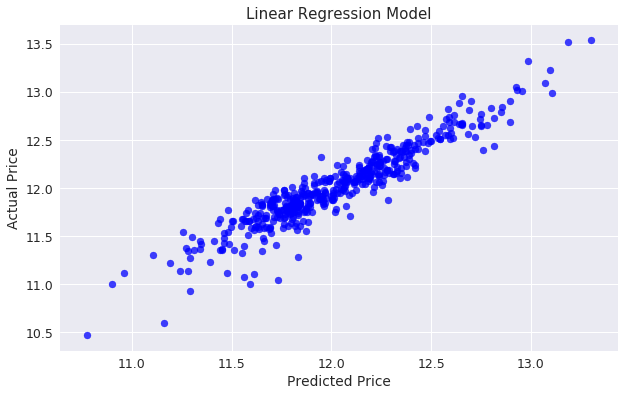

In [101]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

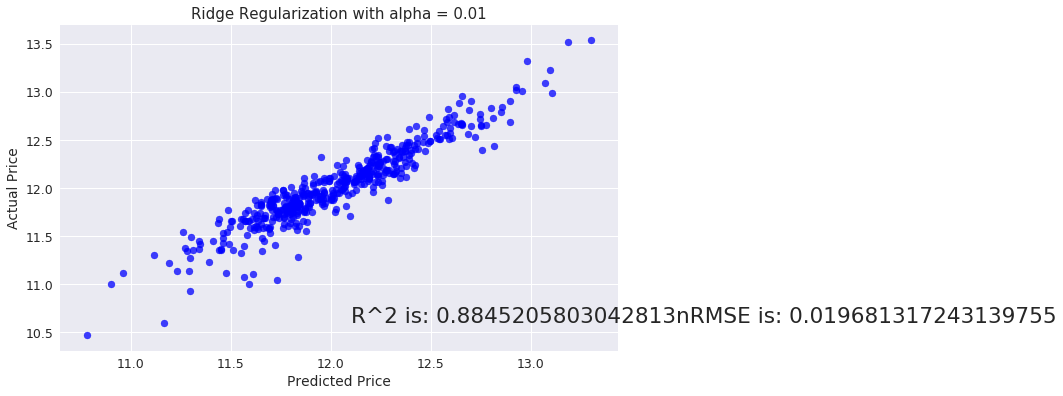

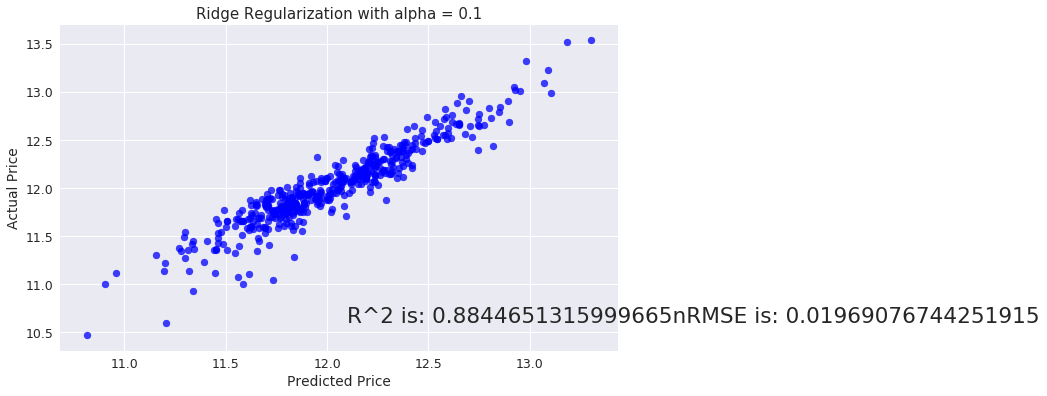

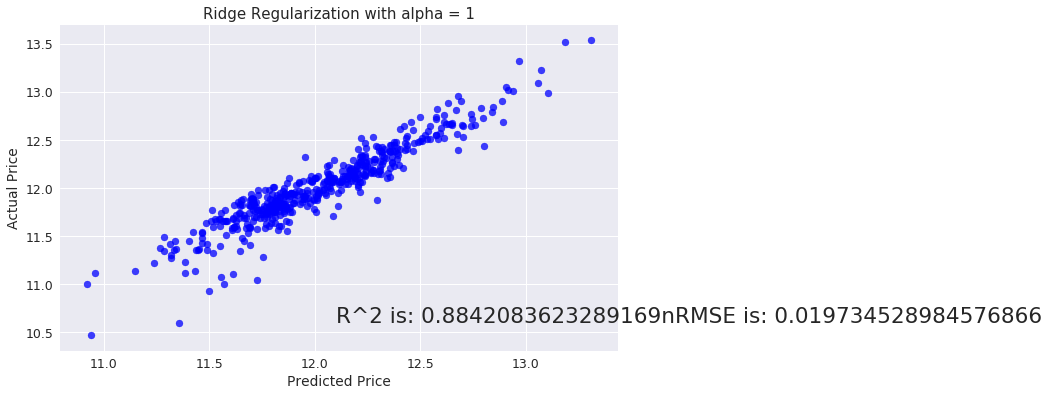

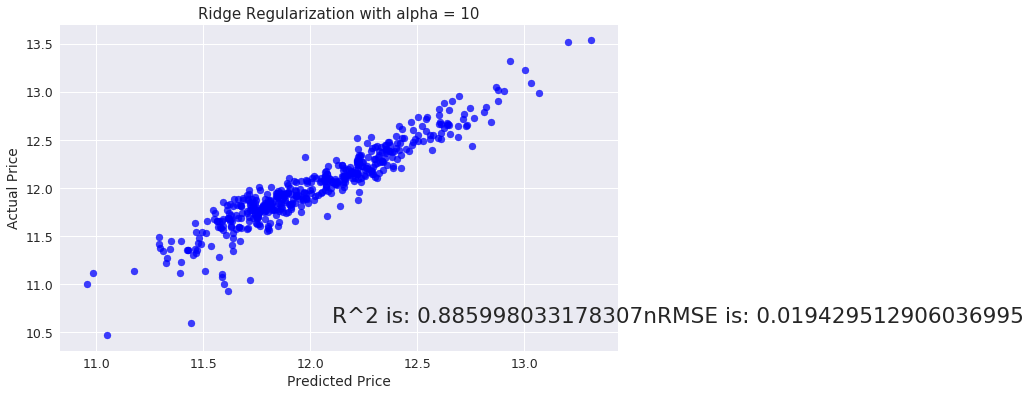

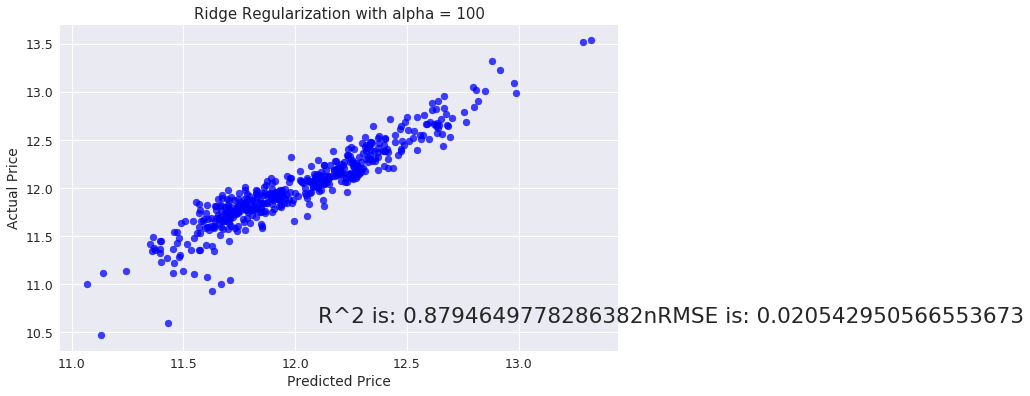

In [102]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()